In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("housing.csv")

In [4]:
import numpy as np

In [9]:
df["income_category"] = pd.cut(df["median_income"], bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1, 2, 3, 4, 5])

In [36]:
from sklearn.model_selection import StratifiedShuffleSplit
 
# Assume income_cat is a column in the dataset created from median_income
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
 
for train_index, test_index in split.split(df, df["income_category"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [40]:
for sett in (strat_train_set, strat_test_set):
    sett.drop("income_category", axis=1, inplace=True)

In [42]:
df = strat_train_set.copy()

<Axes: xlabel='latitude', ylabel='longitude'>

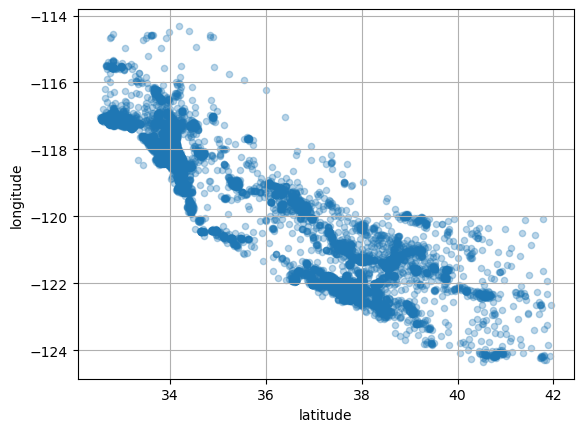

In [43]:
df.plot(kind="scatter", x="latitude", y="longitude", grid=True, alpha=0.3)

<Axes: xlabel='latitude', ylabel='longitude'>

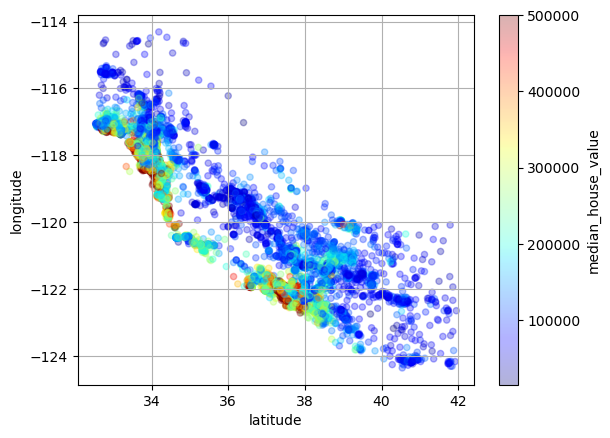

In [46]:
df.plot(kind="scatter", x="latitude", y="longitude", grid=True, alpha=0.3, cmap="jet", c="median_house_value")

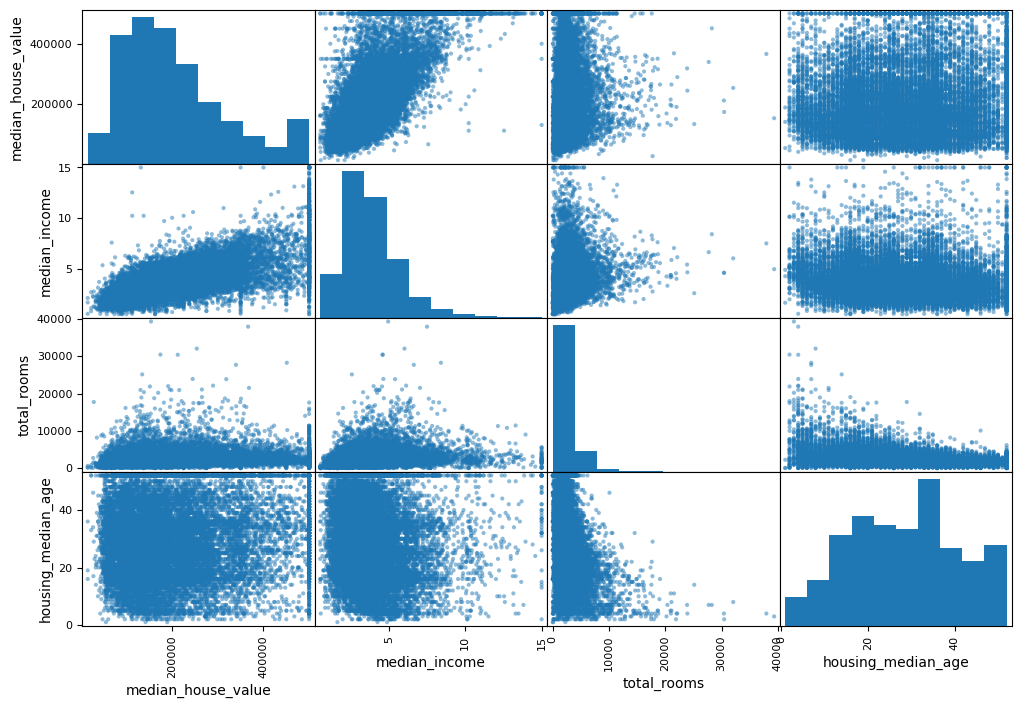

In [47]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()